## NASA API 

In this checkpoint, I am going to practice consuming public APIs through the NASA public APIs portal.

Portal description : The objective of this portal is to make NASA data, including imagery, eminently accessible to application developers and data professionals. Before starting to use its APIs endpoints, it's mandatory that you generate your API KEY and store it somewhere for later use. The API key acts as the user identifier when requesting the API. To get your KEY, fill in the provided form with your personal information, and then we shall receive an email containing your personal API KEY.

➡️ NASA API PORTAL

https://i.imgur.com/hisTmpk.png

 


**Instructions**

1. Go to the NASA API portal and generate your API KEY
2. Import the requests package and store your API KEY in variable
3. Go back to portal website and click on 'browse APIs'
4. Click on the first dropdown menu, named 'APOD' and read its documentation
5. Follow the provided documentation to ask the API endpoint for the astronomy picture of the day. Get then display the image on your notebook.
6. Go through the list of the provided API endpoints once again and select 'Astronomy Picture of the Day' option. Store the results in a pandas dataframe
7. Do the necessary data pre-processing tasks on the previous result in order to get a clean dataframe with the following columns :
- Asteroid ID
- Asteroid name
- The Minimal estimated diameter in Kilometre
- Absolute_magnitude
- Relative_velocity(km/s)


In [27]:
import requests
import pandas as pd
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

In [12]:
# The base URL of the API endpoint
url = "https://api.nasa.gov/planetary/apod"

In [14]:
# Your API key
api_key = "tYXsvYoputTWJbbVnu8UsfRV8MA30fq83ZarMAMu"

In [19]:
# Parameters for the API request, including the API key
params = {
    'api_key': api_key
}

In [21]:
# Send a GET request to the API
response = requests.get(url, params=params)

# Check if the request was successful
response.status_code == 200

True

In [24]:
# Display the weather data as JSON
response.json()

{'copyright': '\nIreneusz Nowak;  \nText: Natalia Lewandowska \n(SUNY Oswego)\n',
 'date': '2024-10-02',
 'explanation': "It is the largest satellite galaxy of our home Milky Way Galaxy. If you live in the south, the Large Magellanic Cloud (LMC) is quite noticeable, spanning about 10 degrees across the night sky, which is 20 times larger than the full moon towards the southern constellation of the dolphinfish (Dorado). Being only about 160,000 light years away, many details of the LMC's structure can be seen, such as its central bar and its single spiral arm. The LMC harbors numerous stellar nurseries where new stars are being born, which appear in pink in the featured image. It is home to the Tarantula Nebula, the currently most active star forming region in the entire Local Group, a small collection of nearby galaxies dominated by the massive Andromeda and Milky Way galaxies. Studies of the LMC and the Small Magellanic Cloud (SMC) by Henrietta Swan Leavitt led to the discovery of the

In [29]:
data = response.json()

In [31]:
# Get the image URL
image_url = data['url']

In [35]:
# Request the image
img_response = requests.get(image_url)

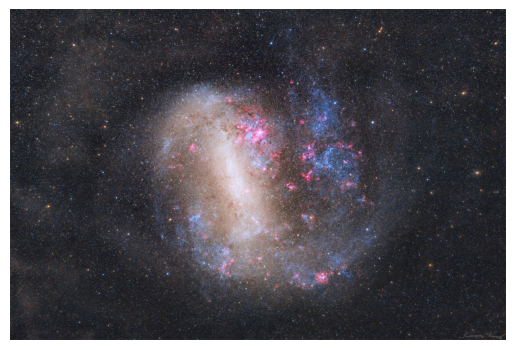

Title: The Large Magellanic Cloud Galaxy
Date: 2024-10-02
Explanation: It is the largest satellite galaxy of our home Milky Way Galaxy. If you live in the south, the Large Magellanic Cloud (LMC) is quite noticeable, spanning about 10 degrees across the night sky, which is 20 times larger than the full moon towards the southern constellation of the dolphinfish (Dorado). Being only about 160,000 light years away, many details of the LMC's structure can be seen, such as its central bar and its single spiral arm. The LMC harbors numerous stellar nurseries where new stars are being born, which appear in pink in the featured image. It is home to the Tarantula Nebula, the currently most active star forming region in the entire Local Group, a small collection of nearby galaxies dominated by the massive Andromeda and Milky Way galaxies. Studies of the LMC and the Small Magellanic Cloud (SMC) by Henrietta Swan Leavitt led to the discovery of the period-luminosity relationship of Cepheid variable

In [39]:
# Open the image and display it using matplotlib
img = Image.open(BytesIO(img_response.content))
plt.imshow(img)
plt.axis('off')
plt.show()
# Display the image and some info
print("Title:", data['title'])
print("Date:", data['date'])
print("Explanation:", data['explanation'])

In [41]:
neo_url = "https://api.nasa.gov/neo/rest/v1/feed"

In [43]:
# Parameters for the API request (retrieves asteroids for a range of dates)
neo_params = {
    'start_date': '2023-10-01',  # Specify the date range you want
    'end_date': '2023-10-02',
    'api_key': api_key
}

In [45]:
# Send a GET request to the NeoWs API
neo_response = requests.get(neo_url, params=neo_params)

In [49]:
# Check if the request was successful
if neo_response.status_code == 200:
    neo_data = neo_response.json()
    
    # Extract the asteroid data from the response
    asteroids = []
    for date, neo_objects in neo_data['near_earth_objects'].items():
        for obj in neo_objects:
            asteroid = {
                'Asteroid ID': obj['id'],
                'Asteroid Name': obj['name'],
                'Minimal Estimated Diameter (km)': obj['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'Absolute Magnitude': obj['absolute_magnitude_h'],
                'Relative Velocity (km/s)': obj['close_approach_data'][0]['relative_velocity']['kilometers_per_second']
            }
            asteroids.append(asteroid)
    
    # Create a pandas DataFrame from the extracted data
    df = pd.DataFrame(asteroids)
    
    # Display the DataFrame
    print(df)
    
else:
    print(f"Error: {neo_response.status_code}")

   Asteroid ID        Asteroid Name  Minimal Estimated Diameter (km)  \
0      2137084   137084 (1998 XS16)                         1.344482   
1      2252399   252399 (2001 TX44)                         0.348783   
2      3342645           (2006 SG7)                         0.071871   
3      3451020           (2009 EG3)                         0.145397   
4      3606252            (2012 OO)                         0.197950   
5      3740047         (2016 AM165)                         0.030518   
6      3888755          (2019 UQ12)                         0.046191   
7     54016425           (2020 FW6)                         0.060333   
8     54016634           (2020 HO2)                         0.036691   
9     54217963           (2021 VA6)                         0.004514   
10    54244779           (2022 CB1)                         0.014878   
11    54304629            (2022 SW)                         0.024920   
12    54380190          (2023 QB10)                         0.11

In [51]:
df.head()

,Asteroid ID,Asteroid Name,Minimal Estimated Diameter (km),Absolute Magnitude,Relative Velocity (km/s)
0,2137084,137084 (1998 XS16),1.344482,16.48,18.0203377818
1,2252399,252399 (2001 TX44),0.348783,19.41,13.1737646759
2,3342645,(2006 SG7),0.071871,22.84,11.2074516962
3,3451020,(2009 EG3),0.145397,21.31,19.7494474735
4,3606252,(2012 OO),0.197950,20.64,9.4421469919
